In [1]:
import os
import pickle

import autocnet
import pandas as pd

%pylab inline

root = '/work/users/cneubauer/ctx_trio'

Populating the interactive namespace from numpy and matplotlib


In [2]:
adjacency = {'G03_019262_1888_XN_08N203W.cal.cub':['P02_001949_1883_XN_08N203W.cal.cub', 'B19_017205_1888_XN_08N203W.cal.cub'],
             'P02_001949_1883_XN_08N203W.cal.cub':['B19_017205_1888_XN_08N203W.cal.cub', 'G03_019262_1888_XN_08N203W.cal.cub'],
             'B19_017205_1888_XN_08N203W.cal.cub':['P02_001949_1883_XN_08N203W.cal.cub','G03_019262_1888_XN_08N203W.cal.cub']}

In [3]:
# Create a candidate graph from the adjacency above
cg = autocnet.CandidateGraph.from_adjacency(adjacency, basepath=root)

In [4]:
# Load the features onto each node
# These are the raw extracted features that are 'interesting'
# This also loads the cameras that can be used for reprojection
for i, n in cg.nodes(data='data'):
    n.load_features(os.path.join(root, n['image_name'] + '_kps.h5'), format='hdf')
    with open(os.path.join(root, n['image_name'][:-8] + '.camera'), 'rb') as f:
        cam = pickle.load(f)
        n.camera = cam

In [5]:
# Load the matches
# Since these matches can from autocnet_server (and a larger project) we remap the source and destination columns to the
#  node ids in this project.
for s, d, e in cg.edges(data='data'):
    source_key = e.source['image_name'][:3]
    destin_key = e.destination['image_name'][:3]
    matches = pd.read_csv(os.path.join(root, '{}_{}_matches.csv'.format(source_key, destin_key)))
    matches['source'] = s
    matches['destination'] = d
    e.matches = matches

In [6]:
cg.compute_fundamental_matrices()

/scratch/autocnet/autocnet/transformation/fundamental_matrix.py:314: UserWarning: F computation fell back to 7-point algorithm, not setting F.
  warnings.warn('F computation fell back to 7-point algorithm, not setting F.')
/scratch/autocnet/autocnet/transformation/fundamental_matrix.py:336: UserWarning: Unable to apply MLE.  Not enough correspondences.  Returning with a RANSAC computed F matrix.
  warnings.warn("Unable to apply MLE.  Not enough correspondences.  Returning with a RANSAC computed F matrix.")


In [7]:
cg[0][1]['data'].matches

,Unnamed: 0,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y,valid
0,0,27349,1,192981,0,36039,8.255806,156.860502,01010000a08c7e0e004588823b899b63403d929900f982...,3885.760010,981.765991,3404.513750,6441.123906,True
1,4,27328,1,106672,0,249846,9.065854,156.858770,01010000a08c7e0e006524ab0a7b9b6340c721aca2b721...,4939.462402,8883.077148,3608.247891,6359.811094,True
2,5,27323,1,24593,0,54971,8.534411,156.710969,01010000a08c7e0e00b5474741c096634012f93e599e11...,2654.208008,3875.131592,818.145371,8780.114063,True
3,9,27327,1,160975,0,242873,8.766931,156.494418,01010000a08c7e0e0094ca2045d28f634028b4cb2cab88...,656.461609,6401.264160,3121.315312,13203.950625,True
4,10,27329,1,3689,0,184207,8.187748,156.649140,01010000a08c7e0e00aac13bc0c5946340b7c2ea782060...,1543.436523,571.126343,2672.201719,7847.741094,True
5,11,27333,1,18437,0,48416,8.452987,156.815473,01010000a08c7e0e00a49e1f5b189a63400200e3f5ede7...,3661.822266,2957.137451,3180.672187,8416.235625,True
6,12,27334,1,164542,0,217686,9.043916,156.834229,01010000a08c7e0e00f4c04c01b29a6340e143382f7c16...,4642.079590,8697.544922,4148.713906,14154.512188,True
7,13,27335,1,188810,0,235465,8.807903,156.748070,01010000a08c7e0e008bbb3431f09763403d235375a59d...,3405.508789,6497.782227,2921.959531,11956.275938,True
8,17,27339,1,124116,0,100134,8.414658,156.587860,01010000a08c7e0e00e9ef61c0cf926340a55fd7054ed4...,1189.677979,2855.007324,687.752324,8313.098750,True
9,18,27340,1,193484,0,95540,8.330991,156.831648,01010000a08c7e0e000effe4db9c9a634024cca7a977a9...,3674.577881,1749.249878,3193.456406,7208.303594,True


In [8]:
cg[1][2]['data'].matches

,Unnamed: 0,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y,valid
0,2,26491,1,41418,2,12155,8.331557,156.600594,01010000a08c7e0e00a6ab5a1038936340aee91cdac1a9...,754.123657,7484.470215,3072.454297,1963.866289,True
1,8,26487,1,93999,2,9446,8.301703,156.704458,01010000a08c7e0e00748b93eb8a966340cbbc6ac9789a...,1835.765015,7069.934082,4150.725000,1550.007305,True
2,9,26488,1,39411,2,10202,8.305610,156.640416,01010000a08c7e0e00085251497e946340324b6bf4789c...,1151.415283,7184.391113,3467.459766,1664.297852,True
3,15,26499,1,65116,2,33891,8.720032,156.547389,01010000a08c7e0e000784d73684916340dd69f412a870...,691.410034,11334.522461,3012.363125,5815.006562,True
4,16,26500,1,230329,2,46517,9.003930,156.650194,01010000a08c7e0e000dab0e63ce946340837936100302...,2168.195557,13979.733398,4487.297188,8459.795625,True
5,39,26508,1,97898,2,73656,8.393420,156.720995,01010000a08c7e0e00f1343c63129763406b922c5b6ec9...,2132.468506,7944.500488,4450.112812,2424.552031,True
6,61,26547,1,173808,2,171559,8.286297,156.612128,01010000a08c7e0e0061039b8c96936340926c35879592...,819.425415,7030.128906,3136.437266,1509.579453,True


In [9]:
cg[0][2]['data'].matches

,Unnamed: 0,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y,valid
0,3,26841,2,225920,0,235089,9.362440,156.430689,01010000a08c7e0e00b548c434c88d634068340cca91b9...,760.126221,12284.609375,2568.152969,12218.264687,True
1,4,26842,2,220382,0,219858,9.367159,156.416634,01010000a08c7e0e0066b46a10558d634064fff23ffcbb...,616.222473,12348.048828,2425.657187,12281.315625,True
2,5,26844,2,217883,0,203682,9.464383,156.455625,01010000a08c7e0e008f9f9f7a948e63406fef59a5c3ed...,1158.640747,13249.359375,1892.642734,11937.811875,True
3,7,26846,2,230505,0,246453,9.389877,156.368326,01010000a08c7e0e00d23a2354c98b634063f38ef49dc7...,127.508820,12627.122070,2054.378906,13159.079063,True
4,9,26847,2,218693,0,217917,9.330751,156.509247,01010000a08c7e0e00e9c5e6c04b906340793b003458a9...,1552.820068,11881.565430,3042.583672,13107.296562,True
5,10,26848,2,72091,0,4905,8.230170,156.768664,01010000a08c7e0e002e3b30e698986340d48878d3d875...,2869.854492,841.522278,1943.262500,12560.681562,True
6,11,26849,2,225996,0,235201,9.364555,156.426997,01010000a08c7e0e00a0741ef6a98d634009b5a2e7a6ba...,723.497070,12309.653320,3361.284844,11816.145000,True
7,12,26850,2,217738,0,203531,9.451786,156.371382,01010000a08c7e0e00c055c45be28b634042ce9b7d50e7...,242.727264,13226.710938,4708.027656,779.158555,True
8,13,26851,2,231701,0,247830,9.466197,156.469770,01010000a08c7e0e00872c735b088f63409118b96eb1ee...,1310.947266,13249.793945,2530.534453,12242.491250,True
9,23,26862,2,230344,0,246283,9.382636,156.376181,01010000a08c7e0e003a0c34ac098c634033d858e4e8c3...,202.548752,12547.117188,2985.201406,12581.338125,True


In [10]:
cg.edges[0, 1]['data']['fundamental_matrix']

array([[-8.93841773e-10, -4.41349713e-08,  2.89934707e-04],
       [ 4.47810296e-08,  2.16361916e-10, -1.54047873e-04],
       [-5.41617437e-04,  1.30174790e-04,  1.00000000e+00]])

In [11]:
cg.edges[0, 2]['data']['fundamental_matrix']

array([[ 1.52856576e-08, -1.19221014e-07, -6.39728813e-04],
       [ 1.13672565e-07, -1.08543217e-09,  9.33954224e-04],
       [ 6.52162192e-04, -6.84332439e-04,  9.99968519e-01]])

In [12]:
cg.edges[1, 2]['data']['fundamental_matrix']

In [13]:
points02 = cg.edges[0, 2]['data'].get_keypoints('source', homogeneous=True)

/scratch/autocnet/autocnet/graph/node.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keypoints['homogeneous'] = 1


In [14]:
from autocnet.transformation.fundamental_matrix import compute_epipolar_lines
compute_epipolar_lines(cg.edges[0, 2]['data']['fundamental_matrix'], points02)

array([[-4.93678144e-01,  8.69644692e-01,  1.51198395e+03],
       [-4.36368808e-01,  8.99767894e-01,  1.98810250e+03],
       [-4.36368808e-01,  8.99767894e-01,  1.98810250e+03],
       ...,
       [-8.59935153e-01,  5.10403305e-01, -2.35970485e+03],
       [-9.08318797e-01,  4.18278572e-01, -3.09322919e+03],
       [-8.37713313e-01,  5.46110250e-01, -2.05564242e+03]])

In [15]:
cg.edges[0, 2]['data'].matches

,Unnamed: 0,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y,valid
0,3,26841,2,225920,0,235089,9.362440,156.430689,01010000a08c7e0e00b548c434c88d634068340cca91b9...,760.126221,12284.609375,2568.152969,12218.264687,True
1,4,26842,2,220382,0,219858,9.367159,156.416634,01010000a08c7e0e0066b46a10558d634064fff23ffcbb...,616.222473,12348.048828,2425.657187,12281.315625,True
2,5,26844,2,217883,0,203682,9.464383,156.455625,01010000a08c7e0e008f9f9f7a948e63406fef59a5c3ed...,1158.640747,13249.359375,1892.642734,11937.811875,True
3,7,26846,2,230505,0,246453,9.389877,156.368326,01010000a08c7e0e00d23a2354c98b634063f38ef49dc7...,127.508820,12627.122070,2054.378906,13159.079063,True
4,9,26847,2,218693,0,217917,9.330751,156.509247,01010000a08c7e0e00e9c5e6c04b906340793b003458a9...,1552.820068,11881.565430,3042.583672,13107.296562,True
5,10,26848,2,72091,0,4905,8.230170,156.768664,01010000a08c7e0e002e3b30e698986340d48878d3d875...,2869.854492,841.522278,1943.262500,12560.681562,True
6,11,26849,2,225996,0,235201,9.364555,156.426997,01010000a08c7e0e00a0741ef6a98d634009b5a2e7a6ba...,723.497070,12309.653320,3361.284844,11816.145000,True
7,12,26850,2,217738,0,203531,9.451786,156.371382,01010000a08c7e0e00c055c45be28b634042ce9b7d50e7...,242.727264,13226.710938,4708.027656,779.158555,True
8,13,26851,2,231701,0,247830,9.466197,156.469770,01010000a08c7e0e00872c735b088f63409118b96eb1ee...,1310.947266,13249.793945,2530.534453,12242.491250,True
9,23,26862,2,230344,0,246283,9.382636,156.376181,01010000a08c7e0e003a0c34ac098c634033d858e4e8c3...,202.548752,12547.117188,2985.201406,12581.338125,True


In [16]:
points02['x']

0         1375.407715
1         2655.642578
2         2655.642578
3         2055.263672
4         2469.850586
5         1117.018311
6         1555.581909
7         1581.733765
8         1851.252197
9         2408.864502
10        2481.528076
11        2755.837402
12        3549.405518
13        3617.211914
14        4241.823730
15         111.762604
16         479.169556
17        1311.898926
18        1311.898926
19        1428.042480
20        1675.126953
21        2027.151367
22        2181.443115
23        2984.556152
24        3959.756592
25          84.020340
26         178.587982
27        2457.979004
28        3542.426270
29         394.153778
             ...     
236569    4337.354492
236570    4147.502930
236571    4309.118652
236572    3699.131104
236573    3427.103516
236574    3427.103516
236575    4031.345947
236576    4485.599121
236577    2629.989502
236578    4147.274902
236579    4147.274902
236580    1687.678589
236581    3460.943604
236582     590.970703
236583    

In [17]:
cg.edges[0, 2]['data'].get_keypoints('source', homogeneous=True)['x']

/scratch/autocnet/autocnet/graph/node.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keypoints['homogeneous'] = 1


0         1375.407715
1         2655.642578
2         2655.642578
3         2055.263672
4         2469.850586
5         1117.018311
6         1555.581909
7         1581.733765
8         1851.252197
9         2408.864502
10        2481.528076
11        2755.837402
12        3549.405518
13        3617.211914
14        4241.823730
15         111.762604
16         479.169556
17        1311.898926
18        1311.898926
19        1428.042480
20        1675.126953
21        2027.151367
22        2181.443115
23        2984.556152
24        3959.756592
25          84.020340
26         178.587982
27        2457.979004
28        3542.426270
29         394.153778
             ...     
236569    4337.354492
236570    4147.502930
236571    4309.118652
236572    3699.131104
236573    3427.103516
236574    3427.103516
236575    4031.345947
236576    4485.599121
236577    2629.989502
236578    4147.274902
236579    4147.274902
236580    1687.678589
236581    3460.943604
236582     590.970703
236583    

In [18]:
cg.edges[0, 2]['data'].matches['source_x']

0      760.126221
1      616.222473
2     1158.640747
3      127.508820
4     1552.820068
5     2869.854492
6      723.497070
7      242.727264
8     1310.947266
9      202.548752
10    1178.021606
11     442.919098
12    1160.563965
13     915.832458
14     822.172485
15    1777.652222
16    2588.391357
Name: source_x, dtype: float64

In [19]:
cg.edges[0, 2]['data'].get_keypoints('source', homogeneous=True)['x'][cg.edges[0, 2]['data'].get_keypoints('source', homogeneous=True)['x'] == 2588.391357]

/scratch/autocnet/autocnet/graph/node.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keypoints['homogeneous'] = 1


232774    2588.391357
Name: x, dtype: float32

In [20]:
cg.edges[0, 2]['data'].get_keypoints('source', homogeneous=True)['x']

/scratch/autocnet/autocnet/graph/node.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keypoints['homogeneous'] = 1


0         1375.407715
1         2655.642578
2         2655.642578
3         2055.263672
4         2469.850586
5         1117.018311
6         1555.581909
7         1581.733765
8         1851.252197
9         2408.864502
10        2481.528076
11        2755.837402
12        3549.405518
13        3617.211914
14        4241.823730
15         111.762604
16         479.169556
17        1311.898926
18        1311.898926
19        1428.042480
20        1675.126953
21        2027.151367
22        2181.443115
23        2984.556152
24        3959.756592
25          84.020340
26         178.587982
27        2457.979004
28        3542.426270
29         394.153778
             ...     
236569    4337.354492
236570    4147.502930
236571    4309.118652
236572    3699.131104
236573    3427.103516
236574    3427.103516
236575    4031.345947
236576    4485.599121
236577    2629.989502
236578    4147.274902
236579    4147.274902
236580    1687.678589
236581    3460.943604
236582     590.970703
236583    

In [21]:
xmax = cg.edges[0, 2]['data'].matches['source_x'].max()

In [22]:
xmin = cg.edges[0, 2]['data'].matches['source_x'].min()

In [23]:
ymax = cg.edges[0, 2]['data'].matches['source_y'].max()

In [24]:
ymin = cg.edges[0, 2]['data'].matches['source_y'].min()

In [25]:
series = cg.edges[0, 2]['data'].get_keypoints('source', homogeneous=True)

/scratch/autocnet/autocnet/graph/node.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keypoints['homogeneous'] = 1


In [26]:
series[series['x'] >= xmin]

,x,y,homogeneous
0,1375.407715,1.958488,1
1,2655.642578,1.798782,1
2,2655.642578,1.798782,1
3,2055.263672,3.124987,1
4,2469.850586,3.260059,1
5,1117.018311,4.104225,1
6,1555.581909,3.637339,1
7,1581.733765,3.633479,1
8,1851.252197,4.302808,1
9,2408.864502,4.172682,1


In [86]:
mask1 = series['x'] <= xmax
mask2 = series['x'] >= xmin
mask3 = series['y'] <= ymax
mask4 = series['y'] >= ymin

print(len(series[mask1]))
print(len(series[mask1 * mask2]))
print(len(series[mask1 * mask2 * mask3]))
print(len(series[mask1 * mask2 * mask3 * mask4]))

147331
140704
140033
130536


/work/users/cneubauer/anaconda/envs/autocnet/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [87]:
series[mask1 * mask2 * mask3 * mask4]

/work/users/cneubauer/anaconda/envs/autocnet/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,x,y,homogeneous
5533,484.995422,841.944946,1
5534,1474.460693,842.356140,1
5535,897.950684,842.569336,1
5537,187.308167,844.314514,1
5538,2217.373535,844.187256,1
5539,2223.386475,843.903625,1
5540,2268.244141,844.391418,1
5541,2455.141113,843.832092,1
5544,911.295288,844.642517,1
5545,1462.711792,845.566956,1


In [88]:
from autocnet.transformation.fundamental_matrix import compute_epipolar_lines
compute_epipolar_lines(cg.edges[0, 2]['data']['fundamental_matrix'], series[mask1 & mask2 & mask3 & mask4])

array([[-5.95602432e-01,  8.03279368e-01,  6.01618740e+02],
       [-5.46163597e-01,  8.37678533e-01,  1.05417420e+03],
       [-5.74457863e-01,  8.18534156e-01,  7.97870141e+02],
       ...,
       [-8.68163937e-01,  4.96277522e-01, -2.47679107e+03],
       [-8.59935153e-01,  5.10403305e-01, -2.35970485e+03],
       [-9.08318797e-01,  4.18278572e-01, -3.09322919e+03]])

In [89]:
from autocnet.transformation.fundamental_matrix import compute_epipolar_lines
lines = compute_epipolar_lines(cg.edges[0, 2]['data']['fundamental_matrix'], series[mask1 & mask2 & mask3 & mask4])

In [140]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,20)

#TODO determine range to go on for destination to map to.
def find_match( line, destination ):
    line_to_plot = []
    rise = line[0]
    run = line[1]
    y_intercept = line[2]

    slope = rise/run
    # y = mx + b 
#     line_to_plot.append( ( (slope) * x) )
#     print( 'y' ,' = ', slope, '(x) +', y_intercept )
    
    # make believe the edges of destination are 0 and 100
    for i in range( 100 ):
        line_to_plot.append(slope * i + y_intercept)
    
    plt.plot(line_to_plot)
    

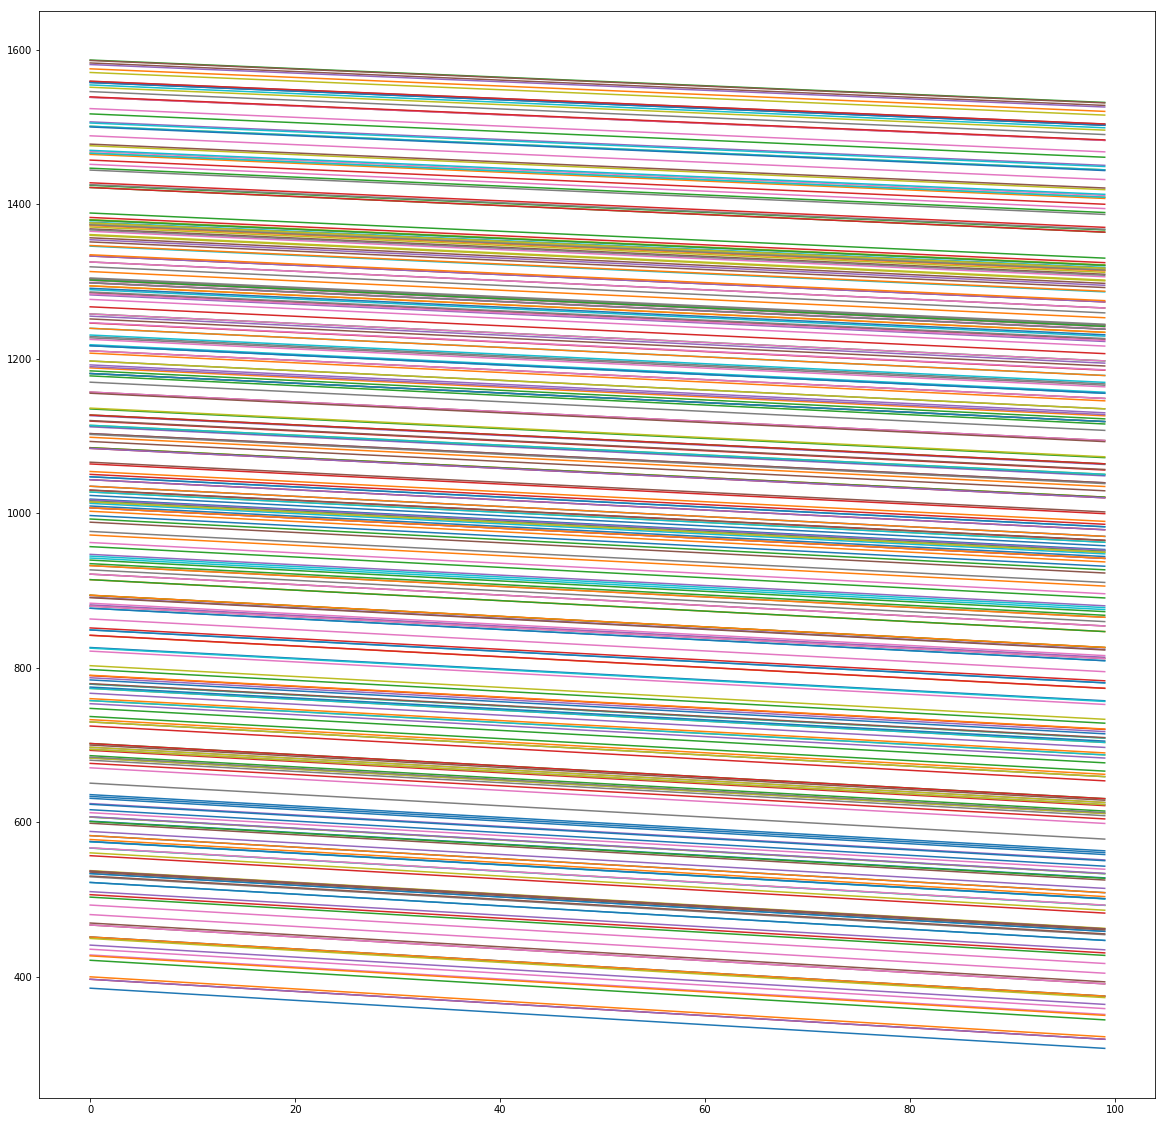

In [141]:
coords = series[mask1 & mask2 & mask3 & mask4]
count = 0
for line, coord in zip(lines, coords.iterrows()) :
    find_match( line, coord[1] )
    if count == 300:
        break
    count += 1

pandas.core.frame.DataFrame

In [92]:
cg[0][2]['data'].matches

,Unnamed: 0,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y,valid
0,3,26841,2,225920,0,235089,9.362440,156.430689,01010000a08c7e0e00b548c434c88d634068340cca91b9...,760.126221,12284.609375,2568.152969,12218.264687,True
1,4,26842,2,220382,0,219858,9.367159,156.416634,01010000a08c7e0e0066b46a10558d634064fff23ffcbb...,616.222473,12348.048828,2425.657187,12281.315625,True
2,5,26844,2,217883,0,203682,9.464383,156.455625,01010000a08c7e0e008f9f9f7a948e63406fef59a5c3ed...,1158.640747,13249.359375,1892.642734,11937.811875,True
3,7,26846,2,230505,0,246453,9.389877,156.368326,01010000a08c7e0e00d23a2354c98b634063f38ef49dc7...,127.508820,12627.122070,2054.378906,13159.079063,True
4,9,26847,2,218693,0,217917,9.330751,156.509247,01010000a08c7e0e00e9c5e6c04b906340793b003458a9...,1552.820068,11881.565430,3042.583672,13107.296562,True
5,10,26848,2,72091,0,4905,8.230170,156.768664,01010000a08c7e0e002e3b30e698986340d48878d3d875...,2869.854492,841.522278,1943.262500,12560.681562,True
6,11,26849,2,225996,0,235201,9.364555,156.426997,01010000a08c7e0e00a0741ef6a98d634009b5a2e7a6ba...,723.497070,12309.653320,3361.284844,11816.145000,True
7,12,26850,2,217738,0,203531,9.451786,156.371382,01010000a08c7e0e00c055c45be28b634042ce9b7d50e7...,242.727264,13226.710938,4708.027656,779.158555,True
8,13,26851,2,231701,0,247830,9.466197,156.469770,01010000a08c7e0e00872c735b088f63409118b96eb1ee...,1310.947266,13249.793945,2530.534453,12242.491250,True
9,23,26862,2,230344,0,246283,9.382636,156.376181,01010000a08c7e0e003a0c34ac098c634033d858e4e8c3...,202.548752,12547.117188,2985.201406,12581.338125,True


array([[-8.93841773e-10, -4.41349713e-08,  2.89934707e-04],
       [ 4.47810296e-08,  2.16361916e-10, -1.54047873e-04],
       [-5.41617437e-04,  1.30174790e-04,  1.00000000e+00]])